In [1]:
import copy
import random

def _select_option(part, options, correction=False):
    initial_values = {'hp':4125, 'atk':52, 'res':64, 'hp%': 0.94, 'crit': 258, 'crit%':1.05, 'ph_atk':69, 'fr_atk':69, 'fl_atk':69, 'vo_atk':69, 'al_atk':137, 
                     'ph_res':215, 'fr_res':215, 'fl_res':215, 'vo_res':215, 'al_res': 215, 'ph_atk%':1.26, 'fr_atk%':1.26, 'fl_atk%':1.26, 'vo_atk%':1.26, 
                     'ph_res%':7.87, 'fr_res%':7.87, 'fl_res%':7.87, 'vo_res%':7.87, 'al_res%': 7.87,'ph_boost':0.65, 'fr_boost':0.65, 'fl_boost':0.65, 'vo_boost':0.65}

    if part == 'Helmet' or part == 'Spaulders' or part == 'Armor' or part == 'Bracers' or part == 'Belt' or part == 'Legguards':
        if correction == False:
            weights = {'hp':6, 'atk':2, 'res':2, 'ph_atk':1, 'fr_atk':1, 'fl_atk':1, 'vo_atk':1, 'ph_res':1, 'fr_res':1, 'fl_res':1, 'vo_res':1}
        elif correction == True:
            weights = {'hp':9, 'atk':3, 'res':3, 'ph_atk':1, 'fr_atk':1, 'fl_atk':1, 'vo_atk':3, 'ph_res':1, 'fr_res':1, 'fl_res':1, 'vo_res':3}

    elif part == 'Gloves' or part == 'Boots':
        if correction == False:
            weights = {'hp':6, 'crit':3, 'atk':2, 'res':2, 'ph_atk':1, 'fr_atk':1, 'fl_atk':1, 'vo_atk':1, 'ph_res':1, 'fr_res':1, 'fl_res':1, 'vo_res':1}
        elif correction == True:
            weights = {'hp':18, 'crit':9, 'atk':6, 'res':6, 'ph_atk':2, 'fr_atk':2, 'fl_atk':2, 'vo_atk':6, 'ph_res':2, 'fr_res':2, 'fl_res':2, 'vo_res':6}

    elif part == 'Exoskeleton' or part == 'Combat Engine' or part == 'Microreactor':
        weights = {'hp':12, 'atk':4, 'res':4, 'hp%': 4, 'ph_atk':2, 'fr_atk':2, 'fl_atk':2, 'vo_atk':2, 'ph_res':2, 'fr_res':2, 'fl_res':2, 'vo_res':2,
                     'ph_atk%':1, 'fr_atk%':1, 'fl_atk%':1, 'vo_atk%':1, 'ph_res%':1, 'fr_res%':1, 'fl_res%':1, 'vo_res%':1, 'ph_boost':1, 'fr_boost':1, 'fl_boost':1, 'vo_boost':1}
        
    elif part == 'Tactics Eyepiece':
        weights = {'hp':60, 'atk':20, 'res':20, 'hp%': 20, 'crit%':10, 'ph_atk':8, 'fr_atk':8, 'fl_atk':8, 'vo_atk':8, 'al_atk':8, 'ph_res':8, 
                     'fr_res':8, 'fl_res':8, 'vo_res':8, 'al_res': 8,'ph_atk%':5, 'fr_atk%':5, 'fl_atk%':5, 'vo_atk%':5, 'ph_res%':4, 'fr_res%':4, 'fl_res%':4, 'vo_res%':4, 'al_res%': 4}
    else:
        print('Wrong part')
        return -1
    
    for key in options.keys():
        weights.pop(key)
    
    total_weight = 0
    for value in weights.values():
        total_weight += value
    
    rand = random.uniform(0, total_weight)
    current_weight = 0
    for key, value in weights.items():
        current_weight += value
        if rand <= current_weight:
            return key, initial_values[key]

def select_option(part, correction=False):
    options = {}
    for _ in range(4):
        try:
            key, value = _select_option(part, options, correction)
            options[key] = value
        except:
            return
    return options

def reinforce_option(options, repeater=False):
    lower_bounds = {'hp':7480, 'atk':93, 'res':117, 'hp%': 1.08, 'crit': 468, 'crit%':1.19, 'ph_atk':125, 'fr_atk':125, 'fl_atk':125, 'vo_atk':125, 'al_atk':249, 
                     'ph_res':390, 'fr_res':390, 'fl_res':390, 'vo_res':390, 'al_res': 390, 'ph_atk%':1.44, 'fr_atk%':1.44, 'fl_atk%':1.44, 'vo_atk%':1.44, 
                     'ph_res%':9.00, 'fr_res%':9.00, 'fl_res%':9.00, 'vo_res%':9.00, 'al_res%': 9.00,'ph_boost':0.72, 'fr_boost':0.72, 'fl_boost':0.72, 'vo_boost':0.72}
    upper_bounds = {'hp':18700, 'atk':234, 'res':292, 'hp%': 1.08, 'crit': 1169, 'crit%':1.19, 'ph_atk':312, 'fr_atk':312, 'fl_atk':312, 'vo_atk':312, 'al_atk':623, 
                     'ph_res':974, 'fr_res':974, 'fl_res':974, 'vo_res':974, 'al_res': 974, 'ph_atk%':1.44, 'fr_atk%':1.44, 'fl_atk%':1.44, 'vo_atk%':1.44, 
                     'ph_res%':9.00, 'fr_res%':9.00, 'fl_res%':9.00, 'vo_res%':9.00, 'al_res%': 9.00,'ph_boost':0.72, 'fr_boost':0.72, 'fl_boost':0.72, 'vo_boost':0.72}
    
    if repeater: # 리피터는 제대로 구현 못 함.. 타속공까지 고려해서 조건을 짜야할텐데 머리아파
        rand = random.randint(0, 2)
        option_list = list(options.keys())
        for key in option_list:
            if key not in ['atk', 'crit', 'crit%', 'ph_atk', 'fr_atk', 'fl_atk', 'vo_atk', 'ph_atk%', 'fr_atk%', 'fl_atk%', 'vo_atk%', 'ph_boost', 'fr_boost', 'fl_boost', 'vo_boost']:
                option_list.remove(key)
                break
        option = option_list[rand]
    else:
        rand = random.randint(0, 3)
        option = list(options.keys())[rand]
        
    if type(lower_bounds[option]) == int:
        value = random.randint(lower_bounds[option], upper_bounds[option])
    elif type(lower_bounds[option]) == float:
        value = lower_bounds[option]
    
    options[option] += value
    
    return option

def augment_option_to_120(options, to_max=False):
    initial_values = {'hp':4125, 'atk':52, 'res':64, 'hp%':0.94, 'crit':258, 'crit%':1.05, 'ph_atk':69, 'fr_atk':69, 'fl_atk':69, 'vo_atk':69, 'al_atk':137, 
                     'ph_res':215, 'fr_res':215, 'fl_res':215, 'vo_res':215, 'al_res': 215, 'ph_atk%':1.26, 'fr_atk%':1.26, 'fl_atk%':1.26, 'vo_atk%':1.26, 
                     'ph_res%':7.87, 'fr_res%':7.87, 'fl_res%':7.87, 'vo_res%':7.87, 'al_res%':7.87,'ph_boost':0.65, 'fr_boost':0.65, 'fl_boost':0.65, 'vo_boost':0.65}
    upper_bounds = {'hp':18700, 'atk':234, 'res':292, 'hp%':1.08, 'crit':1169, 'crit%':1.19, 'ph_atk':312, 'fr_atk':312, 'fl_atk':312, 'vo_atk':312, 'al_atk':623, 
                     'ph_res':974, 'fr_res':974, 'fl_res':974, 'vo_res':974, 'al_res': 974, 'ph_atk%':1.44, 'fr_atk%':1.44, 'fl_atk%':1.44, 'vo_atk%':1.44, 
                     'ph_res%':9.00, 'fr_res%':9.00, 'fl_res%':9.00, 'vo_res%':9.00, 'al_res%':9.00,'ph_boost':0.72, 'fr_boost':0.72, 'fl_boost':0.72, 'vo_boost':0.72}
    maxaug_base_values = {'atk':248, 'ph_atk':332, 'fr_atk': 332, 'fl_atk': 332, 'vo_atk': 332, 'ph_atk%': 0.909, 'fr_atk%': 0.909, 'fl_atk%':0.909, 'vo_atk%':0.909,
                          'ph_boost':0.454, 'fr_boost':0.454, 'fl_boost':0.454, 'vo_boost':0.454, 'crit':1247, 'crit%':1.075}

    option_scores = copy.deepcopy(options)
    for key in list(options.keys()):
        option_scores[key] = (options[key] - initial_values[key]) / upper_bounds[key]

    max_op_key = max(option_scores, key=option_scores.get)

    for key in list(options.keys()): # 옵션 증가치는 89.6~100% 사이 균등분포로 가정, 공격 스탯 외 증가치는 편의를 위해 계산 생략
        increment_value = options[key] - initial_values[key]
        if key in ['atk', 'crit', 'ph_atk', 'fr_atk', 'fl_atk', 'vo_atk']:
            maxaug_value = maxaug_base_values[key] + increment_value * 0.1
            if to_max:
                aug_value = int(maxaug_value)
            else:
                aug_value = int(maxaug_value * (0.896 + random.random() * 0.104))
            options[key] += aug_value

        elif key in ['ph_atk%', 'fr_atk%', 'fl_atk%', 'vo_atk%', 'ph_boost', 'fr_boost', 'fl_boost', 'vo_boost', 'crit%']:
            maxaug_value = maxaug_base_values[key] + increment_value * 0.05
            if to_max:
                aug_value = maxaug_value
            else:
                aug_value = maxaug_value * (0.896 + random.random() * 0.104)
            options[key] += aug_value
            options[key] = round(options[key], 3)

        else:
            aug_value = 0
            
    max_op_val = options[max_op_key]
    max_atk = 0
    max_atkper = 0
    max_boost = 0

    for key in list(options.keys()):
        if key in ['ph_atk', 'fr_atk', 'fl_atk', 'vo_atk']:
            max_atk = max(max_atk, options[key])
        elif key in ['ph_atk%', 'fr_atk%', 'fl_atk%', 'vo_atk%']:
            max_atkper = max(max_atkper, options[key])
        elif key in ['ph_boost', 'fr_boost', 'fl_boost', 'vo_boost']:
            max_boost = max(max_boost, options[key])
    
    boosted_options = [] # 랜덤옵션 상호 부스트 관련, 최고옵션의 0.9~0.95배 사이에서 균등분포로 가정
    for key in list(options.keys()):
        if (key in ['ph_atk', 'fr_atk', 'fl_atk', 'vo_atk']):
            if options[key] != max_atk:
                if to_max:
                    options[key] = int(max(options[key], max_atk * (0.95)))
                else:
                    options[key] = int(max(options[key], max_atk * (0.9 + random.random() * 0.05)))
                boosted_options.append(key)
        if (key in ['ph_atk%', 'fr_atk%', 'fl_atk%', 'vo_atk%']):
            if options[key] != max_atkper:
                if to_max:
                    options[key] = round(max(options[key], max_atkper * (0.95)), 3)
                else:
                    options[key] = round(max(options[key], max_atkper * (0.9 + random.random() * 0.05)), 3)
                boosted_options.append(key)
        if (key in ['ph_boost', 'fr_boost', 'fl_boost', 'vo_boost']):
            if options[key] != max_boost:
                if to_max:
                    options[key] = round(max(options[key], max_boost * (0.95)), 3)
                else:
                    options[key] = round(max(options[key], max_boost * (0.9 + random.random() * 0.05)), 3)
                boosted_options.append(key)

    augmented_options = [] # 돌파옵션, 최고옵션의 0.85~0.95배 사이에서 균등분포로 가정
    if max_op_key in ['ph_atk', 'fr_atk', 'fl_atk', 'vo_atk']:
        for key in ['ph_atk', 'fr_atk', 'fl_atk', 'vo_atk']:
            if key not in list(options.keys()):
                if to_max:
                    options[key] = int(max_op_val * (0.95))
                else:
                    options[key] = int(max_op_val * (0.85 + random.random() * 0.1))
                augmented_options.append(key)
    elif max_op_key in ['ph_atk%', 'fr_atk%', 'fl_atk%', 'vo_atk%']:
        for key in ['ph_atk%', 'fr_atk%', 'fl_atk%', 'vo_atk%']:
            if key not in list(options.keys()):
                if to_max:
                    options[key] = round(max_op_val * (0.95), 3)
                else:
                    options[key] = round(max_op_val * (0.85 + random.random() * 0.1), 3)
                augmented_options.append(key)
    elif max_op_key in ['ph_boost', 'fr_atk', 'fl_boost', 'vo_boost']:
        for key in ['ph_boost', 'fr_boost', 'fl_boost', 'vo_boost']:
            if key not in list(options.keys()):
                if to_max:
                    options[key] = round(max_op_val * (0.95), 3)
                else:
                    options[key] = round(max_op_val * (0.85 + random.random() * 0.1), 3)
                augmented_options.append(key)
    
    for key in ['atk', 'vo_atk', 'crit', 'vo_atk%', 'vo_boost', 'crit%']:
        if key not in list(options.keys()):
            options[key] = 0

    return options, boosted_options, augmented_options

def augment_option_after_120(options, boosted_options, augmented_options):
    pass
         

options = {'hp':4125, 'vo_atk%':7, 'fr_atk%': 1, 'fl_boost': 1}


print(augment_option_to_120(options))

({'hp': 4125, 'vo_atk%': 8.123, 'fr_atk%': 7.575, 'fl_boost': 1.432, 'ph_atk%': 7.682, 'fl_atk%': 7.406, 'atk': 0, 'vo_atk': 0, 'crit': 0, 'vo_boost': 0, 'crit%': 0}, ['fr_atk%'], ['ph_atk%', 'fl_atk%'])


In [2]:
options = select_option('Gloves')
print(options)
for _ in range(5):
    reinforce_option(options)
print(options)
options, boosted_options, augmented_options = augment_option_to_120(options)
print(options, boosted_options, augmented_options)

{'hp': 4125, 'fl_res': 215, 'fl_atk': 69, 'ph_atk': 69}
{'hp': 17997, 'fl_res': 1809, 'fl_atk': 69, 'ph_atk': 265}
{'hp': 17997, 'fl_res': 1809, 'fl_atk': 563, 'ph_atk': 613, 'atk': 0, 'vo_atk': 0, 'crit': 0, 'vo_atk%': 0, 'vo_boost': 0, 'crit%': 0} ['fl_atk'] []


In [2]:
num_samples = 1000000
crit_values = []

for _ in range(num_samples):
    options = select_option('Gloves', correction=False)
    for _ in range(5):
        reinforce_option(options, repeater=False)
    crit_values.append(int(options.get('crit', 0) + (options.get('atk', 0) + options.get('vo_atk', 0)) * 2.4))

crit_values.sort()

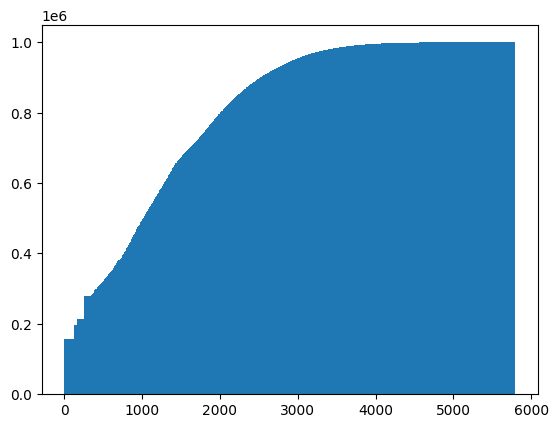

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# plt.axis([4000, 6000, 999500, 1000000])
hist, bins, _ = plt.hist(crit_values, bins=1000, cumulative=True)

# 그래프 표시
plt.show()

In [280]:
num_samples = 100000
crit_values = []

for _ in range(num_samples):
    options = select_option('Gloves', correction=False)
    for _ in range(5):
        reinforce_option(options, repeater=False)
    options, _, _= augment_option_to_120(options, to_max=True)
    
    crit_values.append(int(options['crit'] + (options['atk'] + options['vo_atk']) * 2.4))

crit_values.sort()


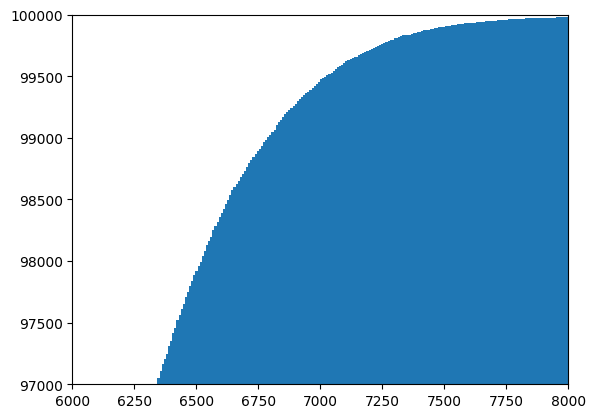

In [284]:
import matplotlib.pyplot as plt

plt.axis([6000, 8000, 97000, 100000])
plt.hist(crit_values, bins=1000, cumulative=True)
plt.show()

In [28]:
num_samples = 1000000
atk_values = []
repeater_strategy = [10000, 10000, 10000, 800, 950]

for _ in range(num_samples):
    options = select_option('Armor', correction=False)
    for i in range(5):
        reinforce_option(options, repeater=False)
    options, _, _= augment_option_to_120(options, to_max=True)
    
    atk_values.append(int((options['atk'] + options['vo_atk'] - 568) / 1.1))

atk_values.sort()

C:\Users\User\AppData\Local\Temp\ipykernel_39964\3548517659.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.3%}'.format(x) for x in current_values])


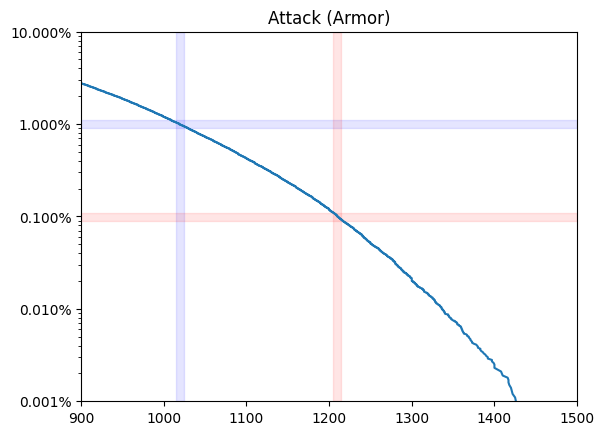

In [56]:
import matplotlib.pyplot as plt

# plt.axis([1000, 1400, 99000, 100000])
yaxis = [(num_samples - i)/num_samples for i in range(num_samples)]
plt.axis([900, 1500, 0.00001, 0.1])
plt.plot(atk_values, yaxis)
plt.yscale('log', base=10)

plt.axvspan(1015, 1025, color='blue', alpha=0.1)
plt.axhspan(0.009, 0.011, color='blue', alpha=0.1)

plt.axvspan(1205, 1215, color='red', alpha=0.1)
plt.axhspan(0.0009, 0.0011, color='red', alpha=0.1)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.3%}'.format(x) for x in current_values])

plt.title('Attack (Armor)')
plt.show()

In [38]:
num_samples = 1000000
crit_values = []

for _ in range(num_samples):
    options = select_option('Gloves', correction=False)
    for _ in range(5):
        reinforce_option(options, repeater=False)
    options, _, _= augment_option_to_120(options, to_max=True)
    
    crit_values.append(int(options['crit'] + (options['atk'] + options['vo_atk']) * 2.4))

crit_values.sort()


C:\Users\User\AppData\Local\Temp\ipykernel_39964\453709334.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.3%}'.format(x) for x in current_values])


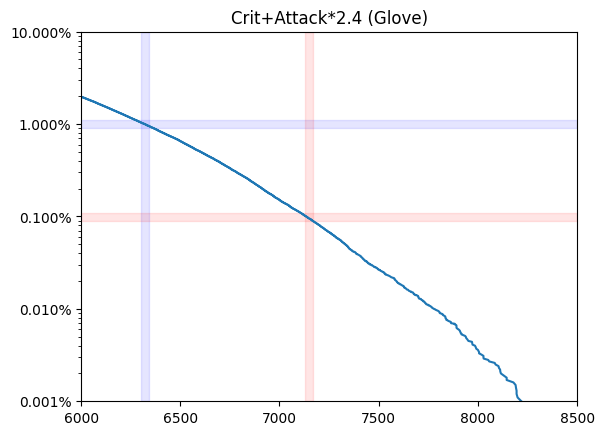

In [57]:
import matplotlib.pyplot as plt

# plt.axis([1000, 1400, 99000, 100000])
yaxis = [(num_samples - i)/num_samples for i in range(num_samples)]
plt.axis([6000, 8500, 0.00001, 0.1])
plt.plot(crit_values, yaxis)
plt.yscale('log', base=10)

plt.axvspan(6300, 6340, color='blue', alpha=0.1)
plt.axhspan(0.009, 0.011, color='blue', alpha=0.1)

plt.axvspan(7130, 7170, color='red', alpha=0.1)
plt.axhspan(0.0009, 0.0011, color='red', alpha=0.1)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.3%}'.format(x) for x in current_values])

plt.title('Crit+Attack*2.4 (Glove)')
plt.show()

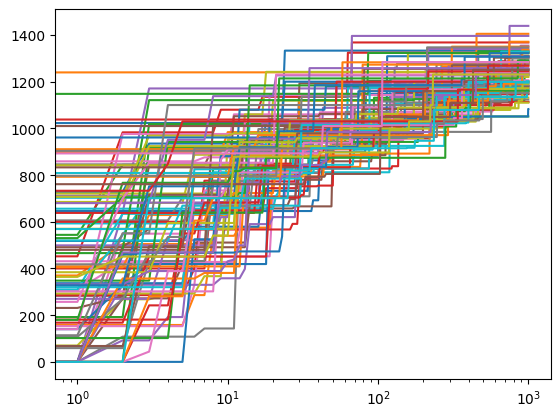

In [337]:
num_trials = 1000
num_samples = 100
max_atk_values = [[] for _ in range(num_samples)]

xaxis = [i for i in range(num_trials)]

i = 0

for i in range(num_samples):
    max_atk_value = 0
    for _ in range(num_trials):
        options = select_option('Armor', correction=False)
        for _ in range(5):
            reinforce_option(options, repeater=False)
        options, _, _= augment_option_to_120(options, to_max=True)
        
        max_atk_value = max(max_atk_value, int((options['atk'] + options['vo_atk'] - 568) / 1.1))
        max_atk_values[i].append(max_atk_value)

plt.xscale('log', base=10)
for i in range(num_samples):
    plt.plot(xaxis, max_atk_values[i])
plt.show()


In [1]:
plt.plot(xaxis, max_atk_values)

NameError: name 'plt' is not defined

In [1]:
a = 1
print(a or 0)
print(b or 0)

1


NameError: name 'b' is not defined